# Adiabatic Flame Example

This example uses `ctwrap` for one-dimensional adiabatic premixed flame simulations defined by the simulation module `adiabatic_flame` (`ctwrap.modules.adiabatic_flame`).

## 1. Function/Class Definitions

In [1]:
import cantera as ct
import ctwrap as cw
import json

## 2. Simulations

### 2.1 Create Simulation Object

Uses a module in the `modules` folder. Modules do not have to depend on `ctwrap`.

In [2]:
sim = cw.Simulation.from_module(cw.modules.adiabatic_flame)
sim

### 2.2 Create Simulation Handler

In [3]:
fname = '../../yaml/adiabatic_flame.yaml'
s = cw.SimulationHandler.from_yaml(fname, verbosity=1)
s

Simulations for entry `upstream.phi` with values: [0.4, 0.6000000000000001, 0.8, 1.0, 1.2000000000000002, 1.4, 1.6, 1.8000000000000003, 2.0, 2.2, 2.4, 2.6]


### 2.3 Run Simulation Tasks in Parallel

In [4]:
%%time
s.run_parallel(sim, verbosity=0)

Wall time: 4.96 s


True

## 3. Create Graphical Output

In [5]:
import h5py
import matplotlib.pyplot as plt
import matplotlib as mpl
col = mpl.rcParams['axes.prop_cycle'].by_key()['color']
n_col = len(col)

### 3.1 Load Data

In [6]:
data = h5py.File(s.output_name, 'r')

In [7]:
data.keys()

<KeysViewHDF5 ['output_00_mix', 'output_00_multi', 'output_01_mix', 'output_01_multi', 'output_02_mix', 'output_02_multi', 'output_03_mix', 'output_03_multi', 'output_04_mix', 'output_04_multi', 'output_05_mix', 'output_05_multi', 'output_06_mix', 'output_06_multi', 'output_07_mix', 'output_07_multi', 'output_08_mix', 'output_08_multi', 'output_09_mix', 'output_09_multi', 'output_10_mix', 'output_10_multi', 'output_11_mix', 'output_11_multi']>

In [8]:
data.attrs.keys()

<KeysViewHDF5 ['defaults', 'strategy', 'tasks']>

In [9]:
var = json.loads(data.attrs['strategy'])
var

{'sequence': {'upstream.phi': [0.4,
   0.6000000000000001,
   0.8,
   1.0,
   1.2000000000000002,
   1.4,
   1.6,
   1.8000000000000003,
   2.0,
   2.2,
   2.4,
   2.6]}}

In [10]:
default = json.loads(data.attrs['defaults'])
default

{'upstream': {'T': '300. kelvin',
  'P': '1. atmosphere',
  'phi': 0.55,
  'fuel': 'H2',
  'oxidizer': 'O2:1,AR:5'},
 'chemistry': {'mechanism': 'h2o2.yaml'},
 'domain': {'width': '30 millimeter'}}

In [11]:
up = default.get('upstream')
up

{'T': '300. kelvin',
 'P': '1. atmosphere',
 'phi': 0.55,
 'fuel': 'H2',
 'oxidizer': 'O2:1,AR:5'}

In [12]:
phi = var['sequence'].get('upstream.phi')
phi

[0.4,
 0.6000000000000001,
 0.8,
 1.0,
 1.2000000000000002,
 1.4,
 1.6,
 1.8000000000000003,
 2.0,
 2.2,
 2.4,
 2.6]

In [13]:
mix = {k.split('<')[0]: dict(data[k]['flame']) for k in data if 'mix' in k}
mlt = {k.split('<')[0]: dict(data[k]['flame']) for k in data if 'multi' in k}

In [14]:
mix.keys()

dict_keys(['output_00_mix', 'output_01_mix', 'output_02_mix', 'output_03_mix', 'output_04_mix', 'output_05_mix', 'output_06_mix', 'output_07_mix', 'output_08_mix', 'output_09_mix', 'output_10_mix', 'output_11_mix'])

### 3.2 Plot

Plot flame speeds and temperature profiles

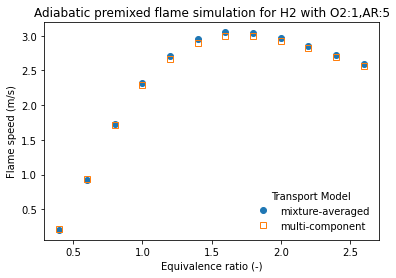

In [15]:
# create figure
fig, ax = plt.subplots(1)

# plot results
u_mix = [ mix[t]['velocity'][0] for t in mix]
u_mlt = [ mlt[t]['velocity'][0] for t in mlt]

ax.plot(phi, u_mix, marker='o', 
            linestyle='none', label='mixture-averaged') 
ax.plot(phi, u_mlt, marker='s', 
            markerfacecolor='none',
            linestyle='none', label='multi-component') 

# add title/axis labels
ax.set_xlabel('Equivalence ratio (-)')
ax.set_ylabel('Flame speed (m/s)')

ax.set_title('Adiabatic premixed flame simulation for {} with {}'.format(up['fuel'],up['oxidizer']))

# add legend
leg = ax.legend(loc='lower right',#prop={'size':11},
                title='Transport Model') # % mech)
_ = leg.draw_frame(False) 

In [16]:
phi

[0.4,
 0.6000000000000001,
 0.8,
 1.0,
 1.2000000000000002,
 1.4,
 1.6,
 1.8000000000000003,
 2.0,
 2.2,
 2.4,
 2.6]

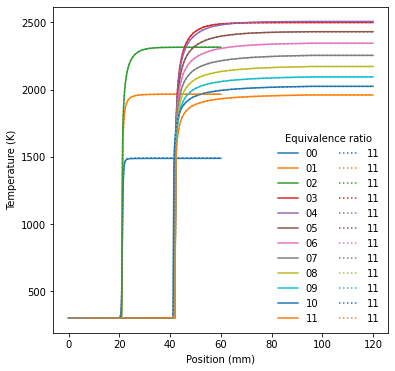

In [17]:
# create figure and adjust size
fig, ax = plt.subplots(1)
fig.set_size_inches(6.,6.)

# plot results
for i, key in enumerate(mix.keys()):
    df = mix[key]
    label = key.split('_')[1]
    ax.plot(1000*df['grid'][:], df['T'][:], color=col[i % n_col], 
            linestyle='-', label=label) 
for i, key in enumerate(mlt.keys()):
    df = mlt[key]
    ax.plot(1000*df['grid'][:], df['T'][:], color=col[i % n_col], 
            linestyle=':', label=label) 

# add title/axis labels
ax.set_xlabel('Position (mm)')
ax.set_ylabel('Temperature (K)')

# add legend
leg = ax.legend(loc='lower right',#prop={'size':11},
                title='Equivalence ratio', ncol=2) # % mech)
_ = leg.draw_frame(False) 